In [2]:
DATASET = "msmarco"
ROUNDING_TYPES = ['rounded_fakeround', 'gauss_noise', 'uniform_noise']

In [3]:
import os, sys
import csv, json
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import torch # type: ignore

In [4]:
sys.path.append('/u/tsouth/projects/PSIKnowledgeMatching/')
# Define the directory path
directory_path = f'{DATASET}/benchmarks/'
# Read baseline value for Recall@100 from the CSV file
baseline_file_path = f"../results/{DATASET}/eval_metrics_DRESNE_{DATASET}.csv"

# Initialize lists to store the extracted data
recall_100 = {}
recall_1000 = {}


In [5]:
# Iterate over each rounding type
for ROUNDING_TYPE in ROUNDING_TYPES:
    # Define the CSV file path
    csv_file_path = f'{directory_path}recalls_{DATASET}_{ROUNDING_TYPE}.csv'

    # Read the CSV file and extract recall@100 and recall@1000 values
    with open(csv_file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header
        recall_100[ROUNDING_TYPE] = []
        recall_1000[ROUNDING_TYPE] = []
        for row in reader:
            if row[0] == "Recall@100":
                recall_100[ROUNDING_TYPE].extend([float(val) for val in row[1:]])
            elif row[0] == "Recall@1000" or row[0] == "recall@1000":
                recall_1000[ROUNDING_TYPE].extend([float(val) for val in row[1:]])



In [6]:
path_query_embeddings = f'../datasets/{DATASET}/query_embeddings.pt'
path_corpus_embeddings = f'../datasets/{DATASET}/corpus_embeddings.pt'

# Verify file existence
if not os.path.exists(path_corpus_embeddings):
    raise FileNotFoundError(f"File '{path_corpus_embeddings}' not found.")
if not os.path.exists(path_query_embeddings):
    raise FileNotFoundError(f"File '{path_query_embeddings}' not found.")

# open up  encoded queries and encoded corpus
query_embeddings = torch.load(path_query_embeddings)
corpus_embeddings = torch.load(path_corpus_embeddings)

In [7]:
query_embedding_range = [query_embeddings.min().item(), query_embeddings.max().item()]
corpus_embedding_range = [corpus_embeddings.min().item(), corpus_embeddings.max().item()]
print(query_embedding_range, corpus_embedding_range)

[-8.67708683013916, 1.166598916053772] [-8.65994930267334, 1.7391433715820312]


In [8]:
with open(f'../datasets/{DATASET}/benchmarks/query_diff_ranges.json', 'r') as f:
    query_diff_ranges = json.load(f)
with open(f'../datasets/{DATASET}/benchmarks/corpus_diff_ranges.json', 'r') as f:
    corpus_diff_ranges = json.load(f)
print(query_diff_ranges,"\n", corpus_diff_ranges)

{'0': 9.843685746192932, '1': 4.921842873096466, '2': 2.460921436548233, '3': 1.2304607182741165, '4': 0.6152303591370583, '5': 0.30761517956852913} 
 {'0': 10.399092674255371, '1': 5.1995463371276855, '2': 2.5997731685638428, '3': 1.2998865842819214, '4': 0.6499432921409607, '5': 0.32497164607048035}


In [9]:
# Define x-axis values (Mean embedding noise as a percentage of embedding range)
n_steps = 6
diff_ranges = query_diff_ranges
embedding_range = query_embedding_range # Assuming query_embedding_range
# Iterate over the values of diff_ranges
x = [value/4 for value in diff_ranges.values()]
# Calculate x values based on embedding range
x = [_x/(embedding_range[1] - embedding_range[0]) for _x in x]


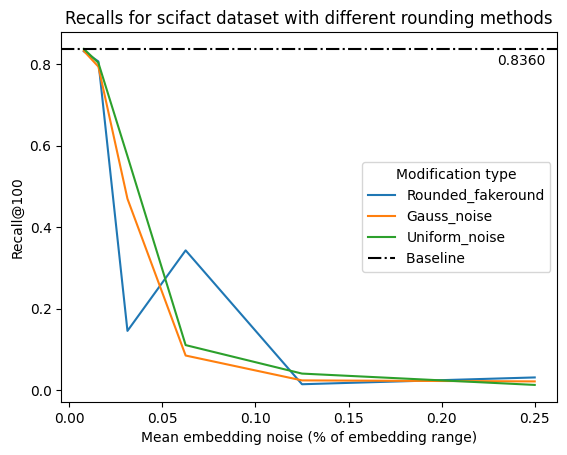

In [10]:
# Make the figure
fig, ax = plt.subplots()

RECALL_TYPE = 'Recall@100'

# Plot recall@100 for each rounding type
for ROUNDING_TYPE in ROUNDING_TYPES:
    ax.plot(x, recall_100[ROUNDING_TYPE], label=f'{ROUNDING_TYPE.capitalize()}')


# Read baseline value for Recall@100 from the CSV file
baseline_file_path = f"../results/{DATASET}/eval_metrics_DRESNE_{DATASET}.csv"

if RECALL_TYPE == 'Recall@100':
    Recall_index = 5 # Recall@100 is at index 5, Recall@1000 is at index 6
elif RECALL_TYPE == 'Recall@1000':
    Recall_index = 6 # Recall@100 is at index 5, Recall@1000 is at index 6
else:
    raise ValueError(f"RECALL_TYPE not given/valid {RECALL_TYPE}")

with open(baseline_file_path, 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header
    for row in reader:
        if row[0] == "Recall":
            y_baseline = float(row[Recall_index])
            break
# Baseline
ax.axhline(y_baseline, color='k', linestyle='dashdot', label='Baseline ')

# Display y_baseline value next to the line
ax.text(0.23, y_baseline-0.01, f'{y_baseline:.4f}', ha='left', va='top')

# Set labels and legend
ax.set_xlabel('Mean embedding noise (% of embedding range)')
ax.set_ylabel(f'{RECALL_TYPE}')
ax.legend(title="Modification type")
ax.set_title(f"Recalls for {DATASET} dataset with different rounding methods")

# Save the plot
plt.savefig(f'plots/{RECALL_TYPE}_{DATASET}_plot.png')

# Show the plot
plt.show()

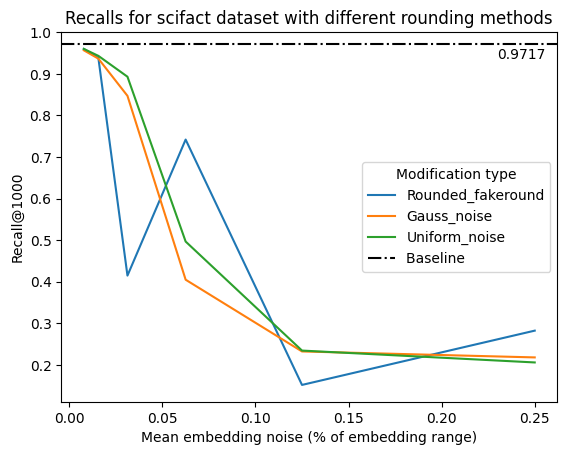

In [11]:
# Make the figure
fig, ax = plt.subplots()

RECALL_TYPE = 'Recall@1000'

# Plot recall@100 for each rounding type
for ROUNDING_TYPE in ROUNDING_TYPES:
    ax.plot(x, recall_1000[ROUNDING_TYPE], label=f'{ROUNDING_TYPE.capitalize()}')

if RECALL_TYPE == 'Recall@100':
    Recall_index = 5 # Recall@100 is at index 5, Recall@1000 is at index 6
elif RECALL_TYPE == 'Recall@1000':
    Recall_index = 6 # Recall@100 is at index 5, Recall@1000 is at index 6
else:
    raise ValueError(f"RECALL_TYPE not given/valid {RECALL_TYPE}")

with open(baseline_file_path, 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header
    for row in reader:
        if row[0] == "Recall":
            y_baseline = float(row[Recall_index])
            break
# Baseline
ax.axhline(y_baseline, color='k', linestyle='dashdot', label='Baseline ')
# Display y_baseline value next to the line
ax.text(0.23, y_baseline-0.01, f'{y_baseline:.4f}', ha='left', va='top')

# Set labels and legend
ax.set_xlabel('Mean embedding noise (% of embedding range)')
ax.set_ylabel(f'{RECALL_TYPE}')
ax.legend(title="Modification type")
ax.set_title(f"Recalls for {DATASET} dataset with different rounding methods")

# Save the plot
plt.savefig(f'plots/{RECALL_TYPE}_{DATASET}_plot.png')

# Show the plot
plt.show()

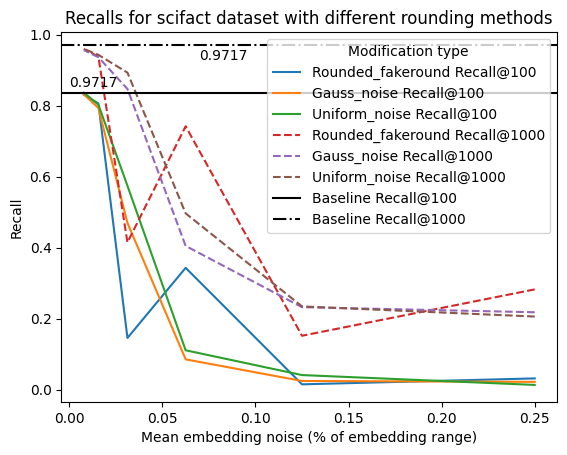

In [15]:
# Make the figure
fig, ax = plt.subplots()

# Plot recall@100 for each rounding type
for ROUNDING_TYPE in ROUNDING_TYPES:
    ax.plot(x, recall_100[ROUNDING_TYPE], label=f'{ROUNDING_TYPE.capitalize()} Recall@100')

# Plot recall@1000 for each rounding type
for ROUNDING_TYPE in ROUNDING_TYPES:
    ax.plot(x, recall_1000[ROUNDING_TYPE], label=f'{ROUNDING_TYPE.capitalize()} Recall@1000', linestyle='--')


# Baseline
with open(baseline_file_path, 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header
    for row in reader:
        if row[0] == "Recall":
            y_baseline_100 = float(row[5])
            break
with open(baseline_file_path, 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header
    for row in reader:
        if row[0] == "Recall":
            y_baseline_1000 = float(row[6])
            break
ax.axhline(y_baseline_100, color='k', label='Baseline Recall@100')
ax.axhline(y_baseline_1000, color='k', linestyle='dashdot', label='Baseline Recall@1000')
# Display y_baseline value next to the line
ax.text(0, y_baseline_100+0.01, f'{y_baseline:.4f}', ha='left', va='bottom')
ax.text(0.07, y_baseline_1000-0.01, f'{y_baseline:.4f}', ha='left', va='top')

# Set labels and legend
ax.set_xlabel('Mean embedding noise (% of embedding range)')
ax.set_ylabel('Recall')
ax.legend(title="Modification type")
ax.set_title(f"Recalls for {DATASET} dataset with different rounding methods")

# Save the plot
plt.savefig(f'plots/all_recalls_{DATASET}_plot.png')

# Show the plot
plt.show()